<a href="https://colab.research.google.com/github/LujainAlthobaiti/Machine_Learning_Bootcamp_By_SDAYA/blob/main/Decision_Trees_for_Swine_Flu_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Decision Trees for Swine Flu Detection**
---

<br>**Dataset Explanation:** We will work on a Swine Flu dataset that tells us if a person has the flu or not based on the symptoms he/she is experiencing. The columns in this dataset are:<br>
* Chills: A feature telling if the person has chills or not.
* Runny nose: A feature telling if the person has a runny nose or not.
* Headache: A feature telling the level of headache that a person is experiencing (It could be Miild, Moderate, or No headache).
* Fever: A feature telling if the person has fever or not.
* Flu: The target value that tells us if the person has the flu or not.

#Importing Librarires

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

#Loading the Dataset

For this notebook we will work with the flu.csv file we've seen earlier

First we need to take a look at the dataset before starting to work on it.

In [16]:
df = pd.read_csv('flu.csv')
df.head()

,Chills,runny nose,head ache,fever,Flu
0,Y,N,Mild,Y,N
1,Y,Y,No,N,Y
2,Y,N,Strong,Y,Y
3,N,Y,Mild,Y,Y
4,N,N,No,N,N


As we can see, we have 4 features that will predict if the person has the Swine Flu or not.

Let's check the shape of our data.

In [17]:
df.shape

(8, 5)

So we have 8 examples in this dataset (A small one! Will be good enough for our demonstration purposes).

Let's next explore some information about it.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Chills      8 non-null      object
 1   runny nose  8 non-null      object
 2   head ache   8 non-null      object
 3   fever       8 non-null      object
 4   Flu         8 non-null      object
dtypes: object(5)
memory usage: 448.0+ bytes


We do not have any missing values. However, all our features and target variables are of data type object which we can't feed to the model, so we need to clean those.

#Dataset Preprocessing

## Converting Categorical Features to Numerical

First thing to consider is changing the categorical features to Numerical in order to feed them to the algorithm so we are able to run the classification.

This would be useful when we use the decision trees later as well.

In [19]:
encoder = preprocessing.LabelEncoder()
df['Chills'] = encoder.fit_transform(df['Chills'])
df['runny nose'] = encoder.fit_transform(df['runny nose'])
df['head ache'] = encoder.fit_transform(df['head ache'])
df['fever'] = encoder.fit_transform(df['fever'])
df['Flu'] = encoder.fit_transform(df['Flu'])

df.head(8)

,Chills,runny nose,head ache,fever,Flu
0,1,0,0,1,0
1,1,1,1,0,1
2,1,0,2,1,1
3,0,1,0,1,1
4,0,0,1,0,0
5,0,1,2,1,1
6,0,1,2,0,0
7,1,1,0,1,1




---

#Decision Trees

Now, you have to solve the same problem but using decision trees that we learned about.

**Question 1:** Import DecisionTreeClassifier, prepare X and Y, and fit your classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

X = df.drop('Flu', axis=1)
Y = df['Flu']

classifier.fit(X,Y)

DecisionTreeClassifier()

##Printing Text Structure of the tree

**Question 2:** Check how you can print the text structure of the built tree using sklearn lirary

In [21]:
from sklearn.tree import export_text
import pandas as pd

# Generate a text-based representation of the tree structure
tree_text = export_text(classifier, feature_names=list(X.columns))

print(tree_text)

|--- runny nose <= 0.50
|   |--- head ache <= 1.50
|   |   |--- class: 0
|   |--- head ache >  1.50
|   |   |--- class: 1
|--- runny nose >  0.50
|   |--- head ache <= 1.50
|   |   |--- class: 1
|   |--- head ache >  1.50
|   |   |--- fever <= 0.50
|   |   |   |--- class: 0
|   |   |--- fever >  0.50
|   |   |   |--- class: 1



##Plotting the tree to see its structure

**Question 3:** Plot the tree structure to see nodes and gini index at the nodes level

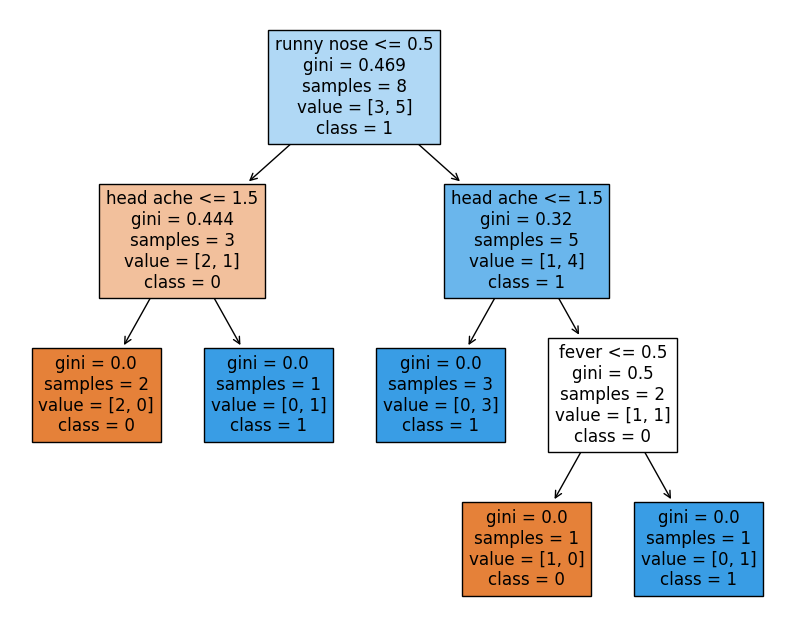

In [32]:
plt.figure(figsize=(10, 8))
plot_tree(classifier, filled=True, feature_names=list(X.columns), class_names=list(map(str, classifier.classes_)))
plt.show()

##Predicting using a Decision Tree

**Question 4:** Confirm the prediction result you got using Naive Bayes previously

In [35]:
# 1 for yes and 0 for no. So, we will predict if he has the all symptoms
result = classifier.predict([[1,1,1,1]])
print(result)

#We can predict the probability of the class here.
print(classifier.predict_proba([[1,1,1,1]]))

[1]
[[0. 1.]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Once again, we get the same result from our DT as our NB algorithm.